In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

## 2a: Sod Shock Tube##
## Setup ###

In [7]:
# constants given
CFL = 0.5
q0 = 4
q1 = 0.5
gamma = 1.4
N = 200

# position array - integer index
x = np.arange(0, 2, 2/N)

del_x = []
for i in range(len(x)-1):
    del_x.append(x[i+1]-x[i])

# velocity & speed array: integer index u
v = np.zeros(N)
#u = np.zeros(N)

# density, pressure, and energy all have half indices
rho = [0]
P = [0]
for xi in x:
    if xi <=0.75:
        rho.append(1)
        P.append(1)
    else:
        rho.append(0.125)
        P.append(0.1)
e = [0]
for i in range(1, len(rho)):
    e.append(P[i]/(rho[i]*(gamma-1)))

# artificial velocity has half indices
# since initial velocity = 0, u = 0, so all q = 0
q = np.zeros(N+1)

# del_m_mid half indices, del_m integer        
del_m_mid = [0]
for i in range(1, len(rho)):
    m_mid = rho[i]*(max(x)-min(x))/N
    del_m_mid.append(m_mid)

del_m  = []
for i in range(len(del_m_mid)-1):
    m = (del_m_mid[i]+del_m_mid[i+1])/2
    del_m.append(m)

# c_s is half index
cs = [np.sqrt(gamma*P[i]/rho[i]) for i in range(1, len(P))]
cs[-1]=0
t = 0
while t < 0.245:
    
    # time-step
    del_t = CFL*min(del_x)/(max(cs+np.abs(v)))
    del_t_mid = .5*(del_t)
    
    # updating velocity
    v_new = [v[i]-del_t*(P[i+1]-P[i] + q[i+1]-q[i])/del_m[i] for i in range(len(v))]
    v = v_new
    v[0]=0
    v[-1]=0
  
    # updating grid positions
    x_new = [x[i]+del_t_mid*v[i] for i in range(len(x))]
    del_x_new = []
    for i in range(len(x_new)-1):
        del_x_new.append(x_new[i+1]-x_new[i])
    x = x_new
    del_x = del_x_new
    
    # udpating density
    rho_new = [0]
    for i in range(len(x)):
        if i !=  len(x)-1:
            rho_new.append(del_m_mid[i+1]/(x[i+1]-x[i]))
        else:
            rho_new.append(del_m_mid[i+1]/(-x[i]))
    rho_average = [0]
    for i in range(1, len(rho)):
        rho_average_i = .5*(1/rho_new[i]+1/rho[i])
        rho_average.append(rho_average_i)

    # conditionally updating artificial velocity
    q_new = [0]
    for i in range(1, len(v)-1):
        if (v[i+1]-v[i])/(x[i+1]-x[i])<0:
            q_i = (q0*(v[i+1]-v[i])**2 - q1*(v[i+1]-v[i]))*cs[i+1]/rho_average[i]
            q_new.append(q_i)
        else:
            q_i = 0
            q_new.append(q_i)
    #q_new.append(0)
    #q_new.append(0)
    #q = q_new
    
    # updating energy
    e_new = [0]
    for i in range(1, len(e)):
        e_new.append(e[i]-(P[i]+q[i])*(1/rho_new[i] - 1/rho[i]))
    rho = rho_new
    e = e_new

    # updating pressure
    P_new = [e[i]*rho[i]*(gamma-1) for i in range(len(e))]
    P = P_new

    # updating sound spped
    cs_new = [np.sqrt(gamma*P[i]/rho[i]) for i in range(1, len(P))]
    cs = cs_new 
    cs[-1]=0
    
    # uppdating time
    t = t+del_t
        
        

<IPython.core.display.Javascript object>


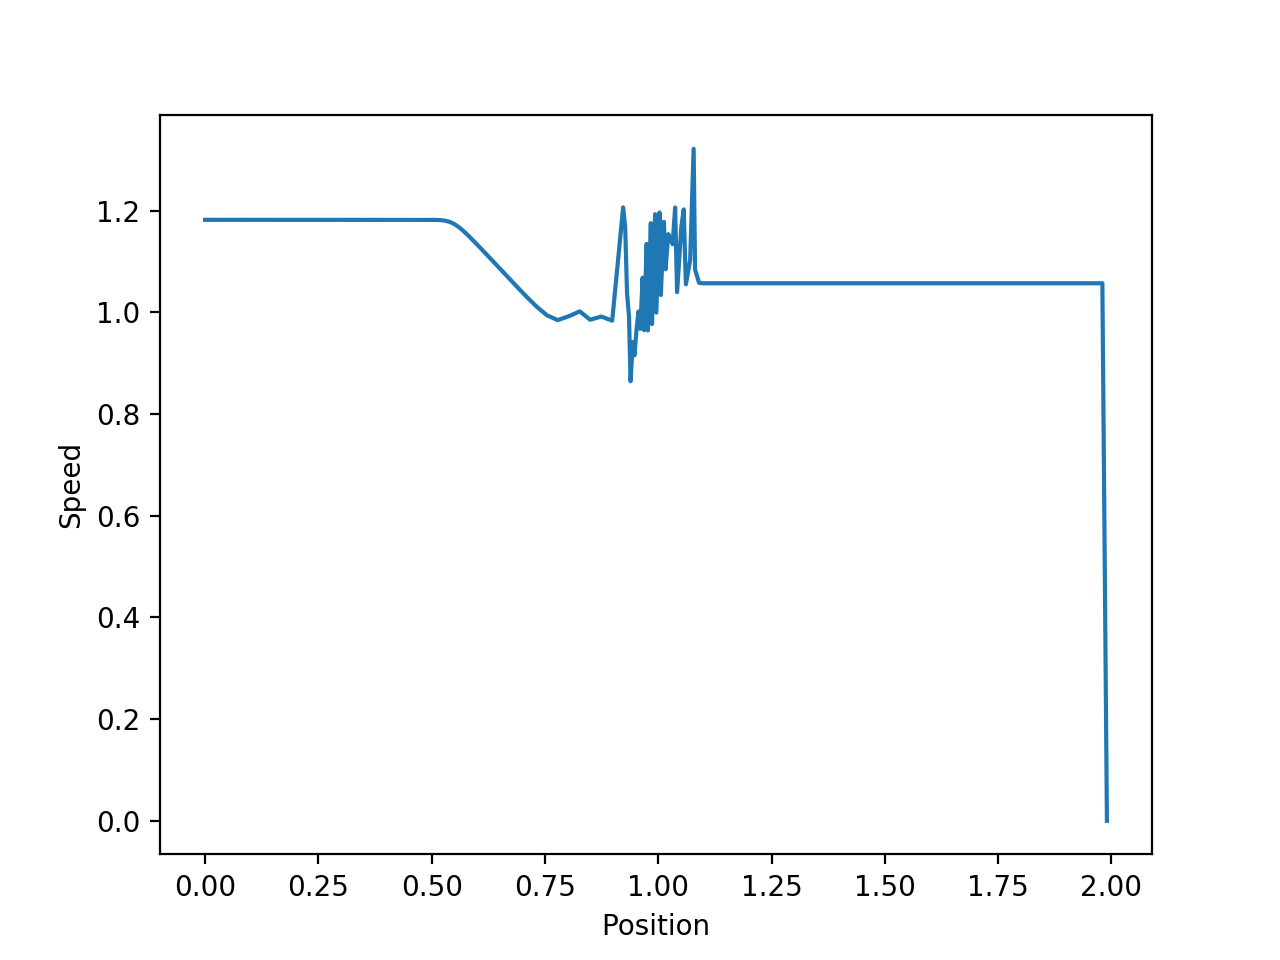

<IPython.core.display.Javascript object>


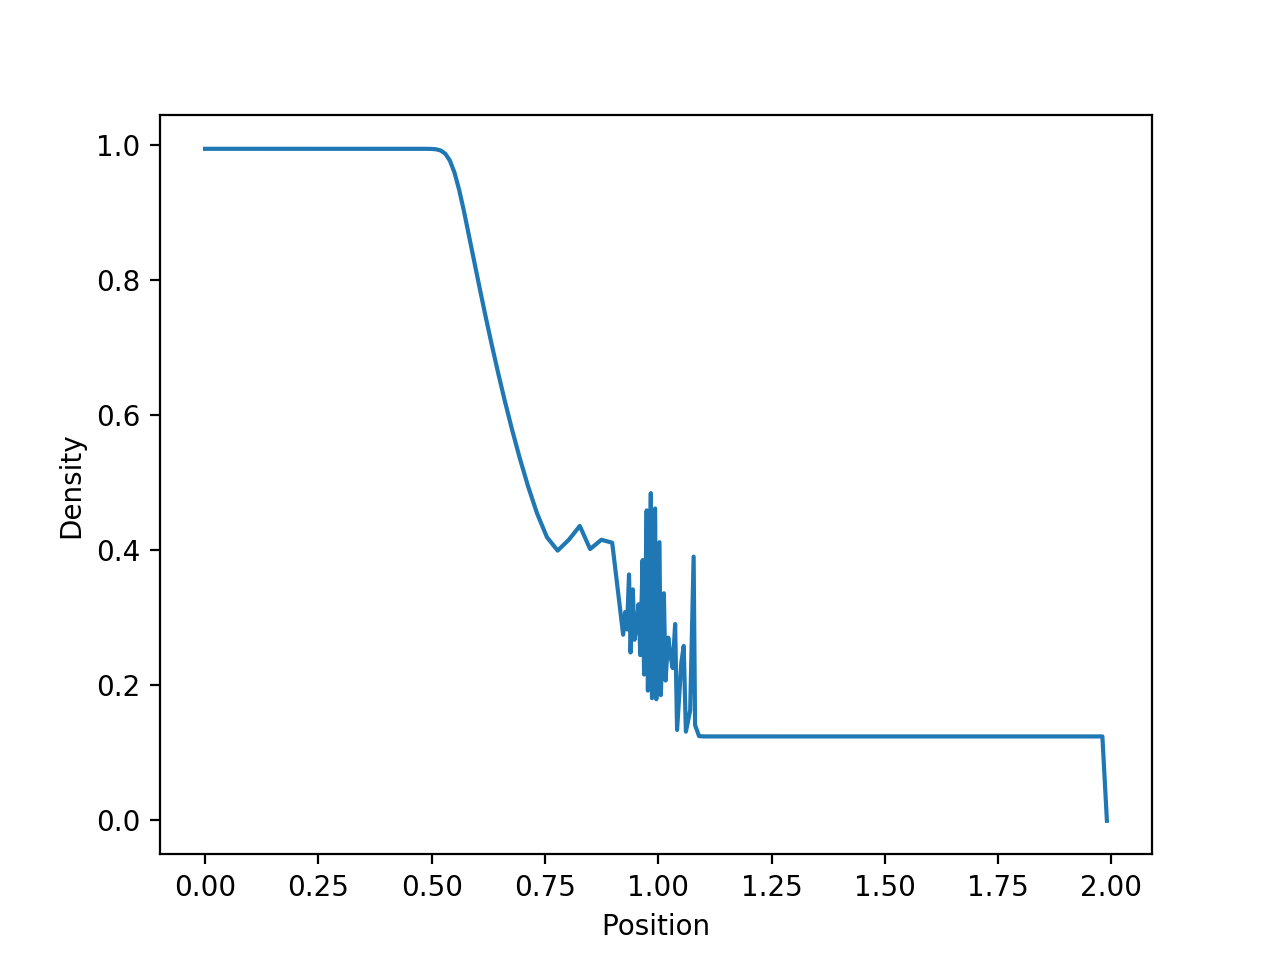

<IPython.core.display.Javascript object>


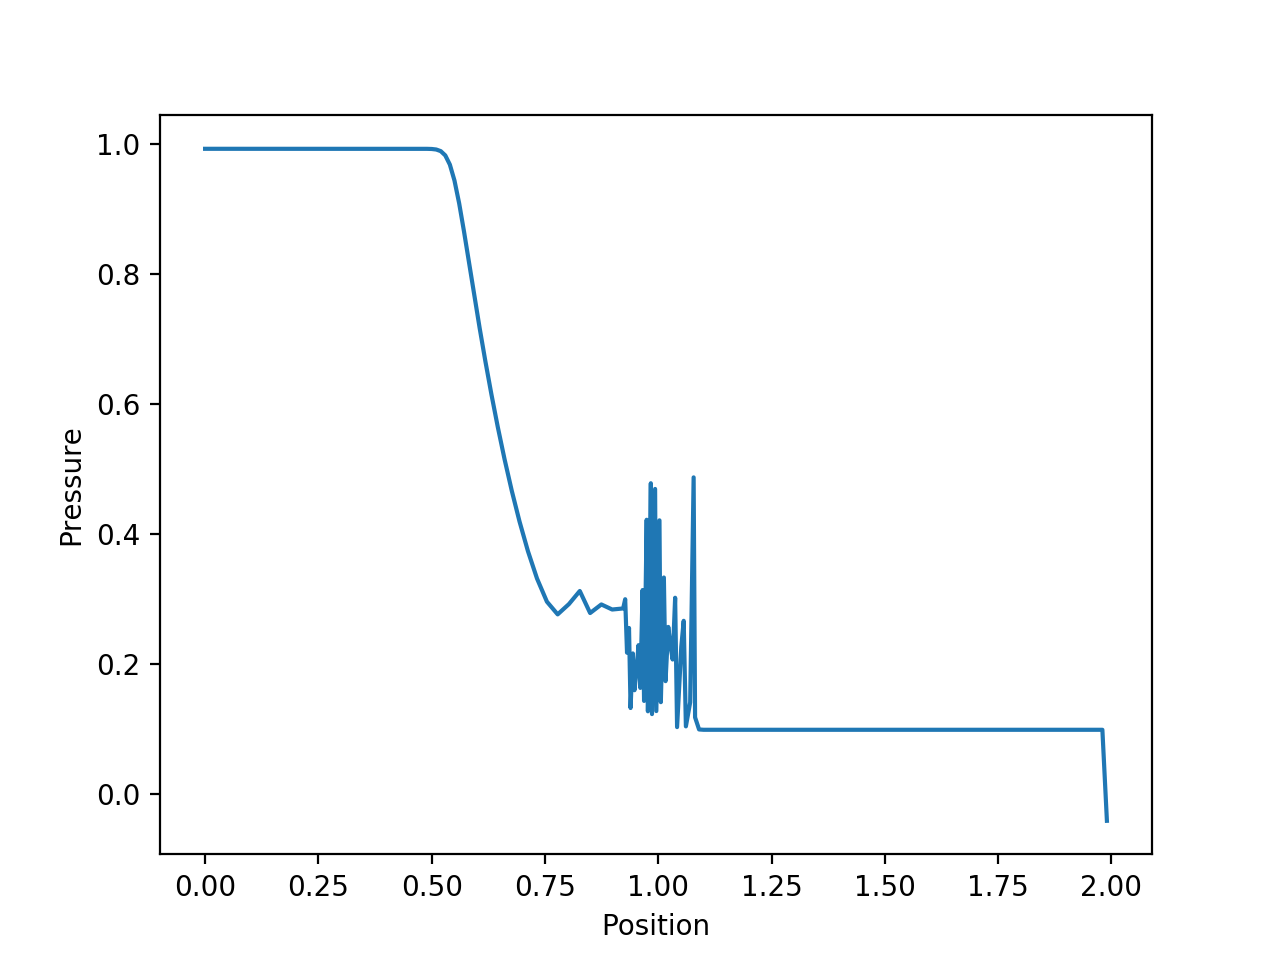

<IPython.core.display.Javascript object>


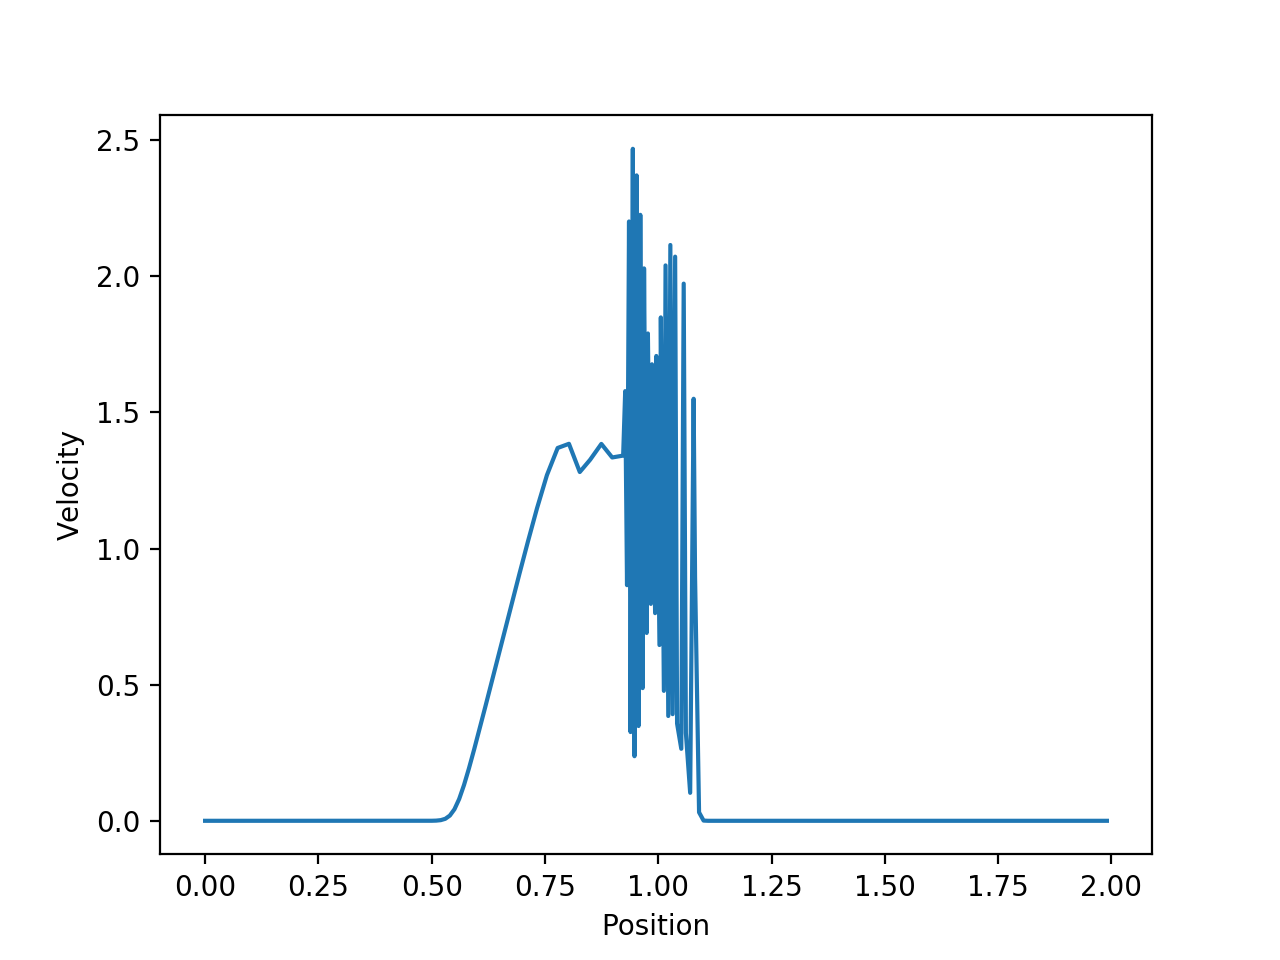

In [8]:
plt.figure()
plt.plot(x, cs)
plt.xlabel('Position')
plt.ylabel('Speed')

plt.figure()
plt.plot(x, rho[1:])
plt.xlabel('Position')
plt.ylabel('Density')

plt.figure()
plt.plot(x, P[1:])
plt.xlabel('Position')
plt.ylabel('Pressure')

plt.figure()
plt.plot(x, v)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.savefig('sst_v.png')

## 2c: Sod Shock Tube ##
### Testing N Values ###

In [153]:
# constants given
CFL = 0.5
q0 = 4
q1 = 0.5
gamma = 1.4

# varying grid cells
Ns = [100, 200, 400]

xs = []
us = []
rhos = []
Ps = []
vs = []
for N in Ns:

    # position array - integer index
    x = np.arange(0, 2, 2/N)

    del_x = []
    for i in range(len(x)-1):
        del_x.append(x[i+1]-x[i])

    # velocity & speed array: integer index u
    v = np.zeros(N)
    u = np.zeros(N)

    # density, pressure, and energy all have half indices
    rho = [0]
    P = [0]
    for xi in x:
        if xi <=0.75:
            rho.append(1)
            P.append(1)
        else:
            rho.append(0.125)
            P.append(0.1)
    e = [0]
    for i in range(1, len(rho)):
        e.append(P[i]/(rho[i]*(gamma-1)))

    # artificial velocity has half indices
    # since initial velocity = 0, u = 0, so all q = 0
    q = np.zeros(N+1)

    # del_m_mid half indices, del_m integer        
    del_m_mid = [0]
    for i in range(1, len(rho)):
        m_mid = rho[i]*(max(x)-min(x))/N
        del_m_mid.append(m_mid)

    del_m  = []
    for i in range(len(del_m_mid)-1):
        m = (del_m_mid[i]+del_m_mid[i+1])/2
        del_m.append(m)

    # c_s is half index
    cs = [np.sqrt(gamma*P[i]/rho[i]) for i in range(1, len(P))]

    t = 0
    while t < 0.245:

        # time-step
        del_t = CFL*min(del_x)/(max(cs+np.abs(v)))

        # updating velocity
        v_new = [v[i]-del_t*(P[i+1]-P[i] + q[i+1]-q[i])/del_m[i] for i in range(len(v))]
        v = v_new
        v[0]=0
        v[-1]=0

        # updating grid positions
        x_new = [x[i]+del_t*v[i] for i in range(len(x))]
        del_x_new = []
        for i in range(len(x_new)-1):
            del_x_new.append(x_new[i+1]-x_new[i])
        x = x_new
        del_x = del_x_new

        # updating relative velocity
        u_new = [0]
        for i in range(len(del_x)):
            u_new.append(del_x[i]/del_t)
        u_new[-1]=0
        u = u_new

        # udpating density
        rho_new = [0]
        for i in range(len(x)):
            if i !=  len(x)-1:
                rho_new.append(del_m_mid[i+1]/(x[i+1]-x[i]))
            else:
                rho_new.append(del_m_mid[i+1]/(-x[i]))
        rho_average = [0]
        for i in range(1, len(rho)):
            rho_average_i = .5*(1/rho_new[i]+1/rho[i])
            rho_average.append(rho_average_i)

        # conditionally updating artificial velocity
        q_new = [0]
        for i in range(1, len(u)-1):
            if (u[i+1]-u[i])/(x[i+1]-x[i])<0:
                q_i = (q0*(u[i+1]-u[i])**2 - q1*(u[i+1]-u[i]))*cs[i+1]/rho_average[i]
                q_new.append(q_i)
            else:
                q_i = 0
                q_new.append(q_i)

        # updating energy
        e_new = [0]
        for i in range(1, len(e)):
            e_new.append(e[i]-(P[i]+q[i])*(1/rho_new[i] - 1/rho[i]))
        rho = rho_new
        e = e_new

        # updating pressure
        P_new = [e[i]*rho[i]*(gamma-1) for i in range(len(e))]
        P = P_new

        # updating sound spped
        cs_new = [np.sqrt(gamma*P[i]/rho[i]) for i in range(1, len(P))]
        cs = cs_new 

        # updating time
        t = t+del_t
        
    xs.append(x)
    us.append(u)
    rhos.append(rho)
    Ps.append(P)
    vs.append(v)

<IPython.core.display.Javascript object>


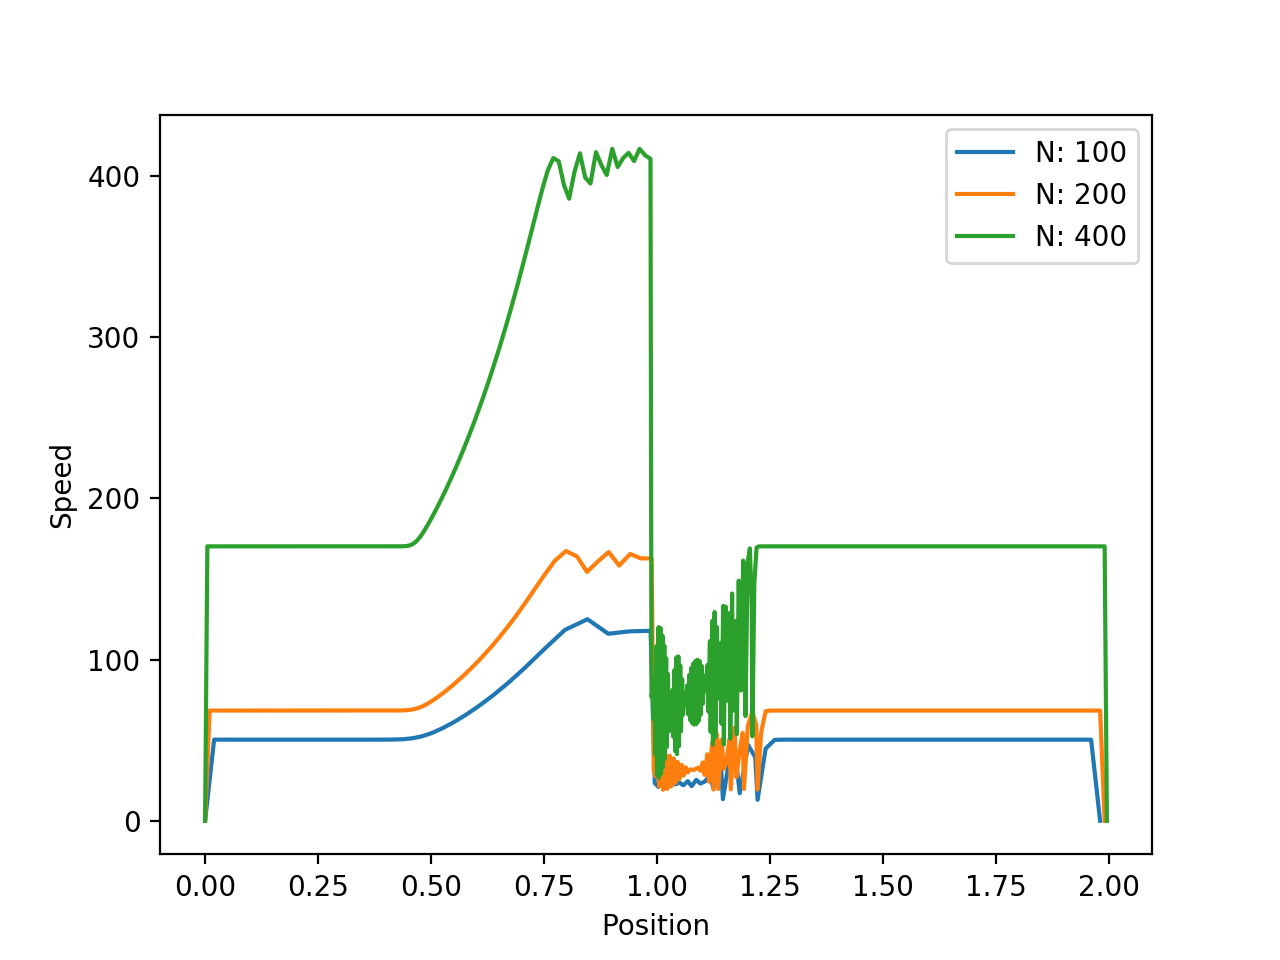

<IPython.core.display.Javascript object>


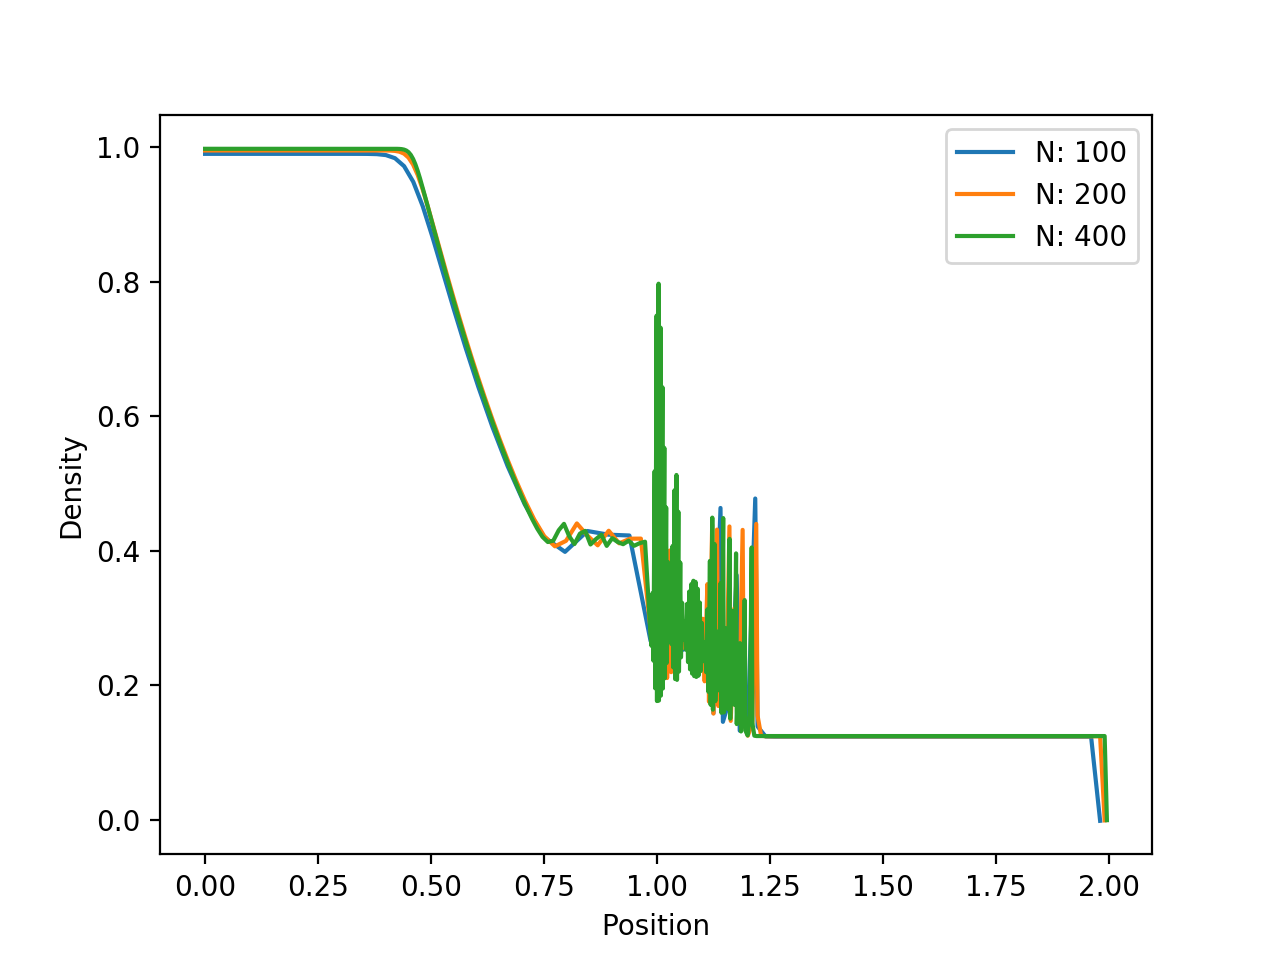

<IPython.core.display.Javascript object>


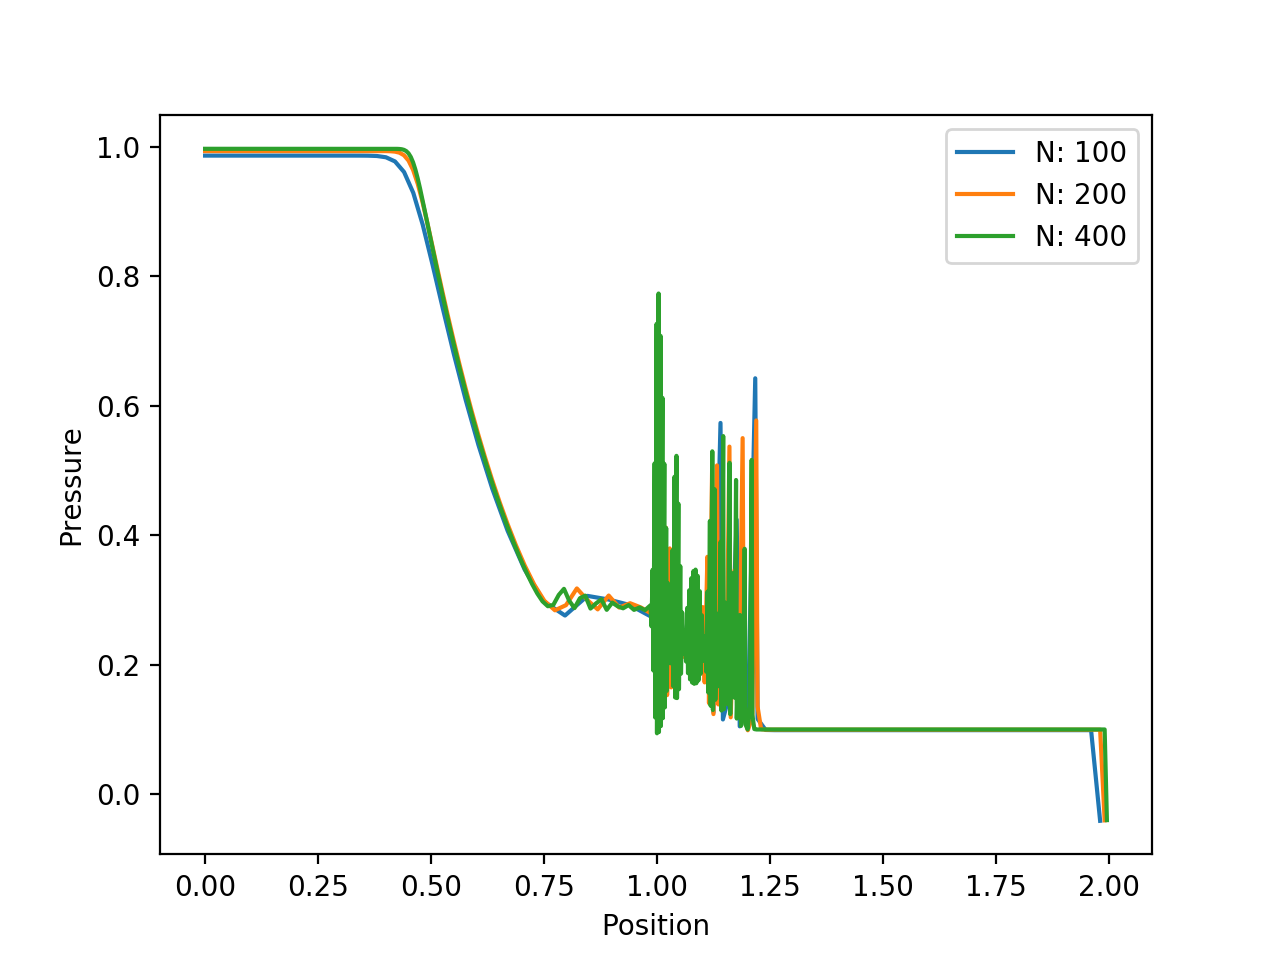

<IPython.core.display.Javascript object>


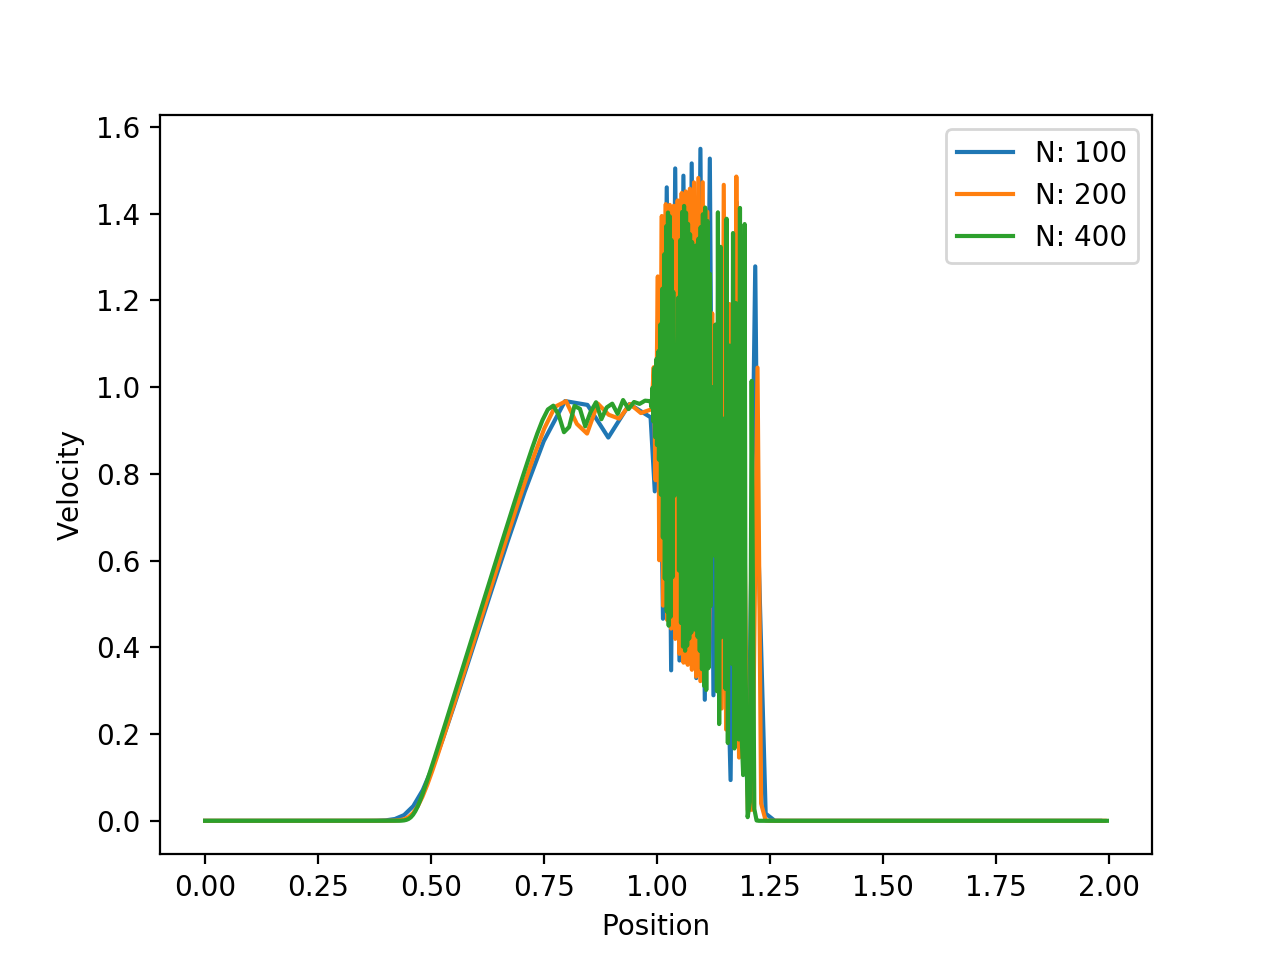

In [154]:
plt.figure()
plt.plot(xs[0], us[0], label = 'N: '+ str(Ns[0]))
plt.plot(xs[1], us[1], label = 'N: '+ str(Ns[1]))
plt.plot(xs[2], us[2], label = 'N: '+ str(Ns[2]))
plt.xlabel('Position')
plt.ylabel('Speed')
plt.legend()

plt.figure()
plt.plot(xs[0], rhos[0][1:], label = 'N: '+ str(Ns[0]))
plt.plot(xs[1], rhos[1][1:], label = 'N: '+ str(Ns[1]))
plt.plot(xs[2], rhos[2][1:], label = 'N: '+ str(Ns[2]))
plt.xlabel('Position')
plt.ylabel('Density')
plt.legend()

plt.figure()
plt.plot(xs[0], Ps[0][1:], label = 'N: '+ str(Ns[0]))
plt.plot(xs[1], Ps[1][1:], label = 'N: '+ str(Ns[1]))
plt.plot(xs[2], Ps[2][1:], label = 'N: '+ str(Ns[2]))
plt.xlabel('Position')
plt.ylabel('Pressure')
plt.legend()

plt.figure()
plt.plot(xs[0], vs[0], label = 'N: '+ str(Ns[0]))
plt.plot(xs[1], vs[1], label = 'N: '+ str(Ns[1]))
plt.plot(xs[2], vs[2], label = 'N: '+ str(Ns[2]))
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend()

## 2d: Sod Shock Tube ##
### Testing CFL Values ###

In [167]:
# constants given
q0 = 4
q1 = 0.5
gamma = 1.4
N = 200

# varying grid cells
CFLs = [0.25, 0.5, 1.1]

xs = []
us = []
rhos = []
Ps = []
vs = []
for CFL in CFLs:

    # position array - integer index
    x = np.arange(0, 2, 2/N)

    del_x = []
    for i in range(len(x)-1):
        del_x.append(x[i+1]-x[i])

    # velocity & speed array: integer index u
    v = np.zeros(N)
    u = np.zeros(N)

    # density, pressure, and energy all have half indices
    rho = [0]
    P = [0]
    for xi in x:
        if xi <=0.75:
            rho.append(1)
            P.append(1)
        else:
            rho.append(0.125)
            P.append(0.1)
    e = [0]
    for i in range(1, len(rho)):
        e.append(P[i]/(rho[i]*(gamma-1)))

    # artificial velocity has half indices
    # since initial velocity = 0, u = 0, so all q = 0
    q = np.zeros(N+1)

    # del_m_mid half indices, del_m integer        
    del_m_mid = [0]
    for i in range(1, len(rho)):
        m_mid = rho[i]*(max(x)-min(x))/N
        del_m_mid.append(m_mid)

    del_m  = []
    for i in range(len(del_m_mid)-1):
        m = (del_m_mid[i]+del_m_mid[i+1])/2
        del_m.append(m)

    # c_s is half index
    cs = [np.sqrt(gamma*P[i]/rho[i]) for i in range(1, len(P))]

    t = 0
    while t < 0.245:

        # time-step
        del_t = CFL*min(del_x)/(max(cs+np.abs(v)))

        # updating velocity
        v_new = [v[i]-del_t*(P[i+1]-P[i] + q[i+1]-q[i])/del_m[i] for i in range(len(v))]
        v = v_new
        v[0]=0
        v[-1]=0

        # updating grid positions
        x_new = [x[i]+del_t*v[i] for i in range(len(x))]
        del_x_new = []
        for i in range(len(x_new)-1):
            del_x_new.append(x_new[i+1]-x_new[i])
        x = x_new
        del_x = del_x_new

        # updating relative velocity
        u_new = [0]
        for i in range(len(del_x)):
            u_new.append(del_x[i]/del_t)
        u_new[-1]=0
        u = u_new

        # udpating density
        rho_new = [0]
        for i in range(len(x)):
            if i !=  len(x)-1:
                rho_new.append(del_m_mid[i+1]/(x[i+1]-x[i]))
            else:
                rho_new.append(del_m_mid[i+1]/(-x[i]))
        rho_average = [0]
        for i in range(1, len(rho)):
            rho_average_i = .5*(1/rho_new[i]+1/rho[i])
            rho_average.append(rho_average_i)

        # conditionally updating artificial velocity
        q_new = [0]
        for i in range(1, len(u)-1):
            if (u[i+1]-u[i])/(x[i+1]-x[i])<0:
                q_i = (q0*(u[i+1]-u[i])**2 - q1*(u[i+1]-u[i]))*cs[i+1]/rho_average[i]
                q_new.append(q_i)
            else:
                q_i = 0
                q_new.append(q_i)

        # updating energy
        e_new = [0]
        for i in range(1, len(e)):
            e_new.append(e[i]-(P[i]+q[i])*(1/rho_new[i] - 1/rho[i]))
        rho = rho_new
        e = e_new

        # updating pressure
        P_new = [e[i]*rho[i]*(gamma-1) for i in range(len(e))]
        P = P_new

        # updating sound spped
        cs_new = [np.sqrt(gamma*P[i]/rho[i]) for i in range(1, len(P))]
        cs = cs_new 

        # updating time
        t = t+del_t
        
    xs.append(x)
    us.append(u)
    rhos.append(rho)
    Ps.append(P)
    vs.append(v)   
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Javascript object>


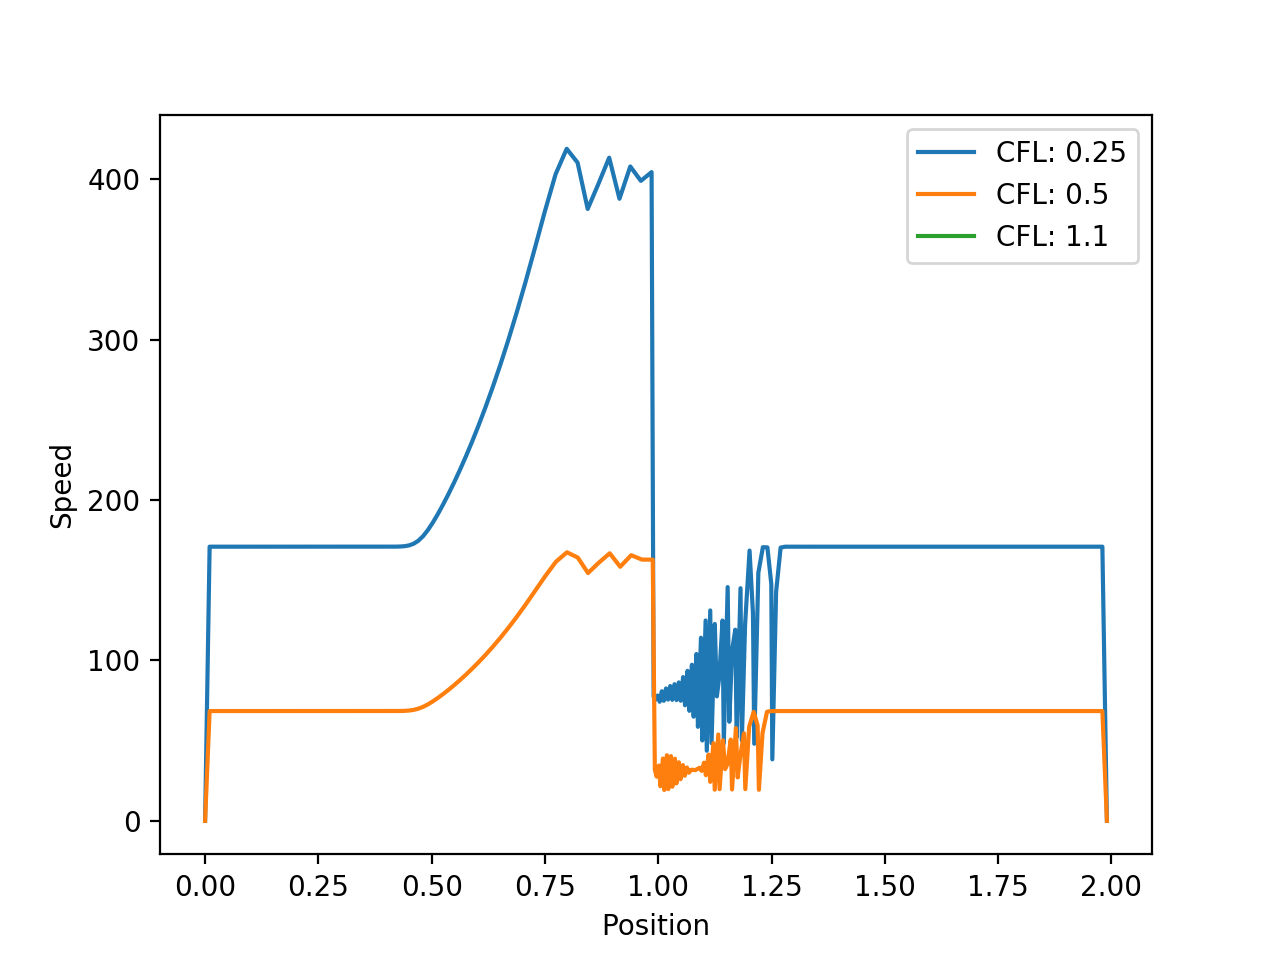

<IPython.core.display.Javascript object>


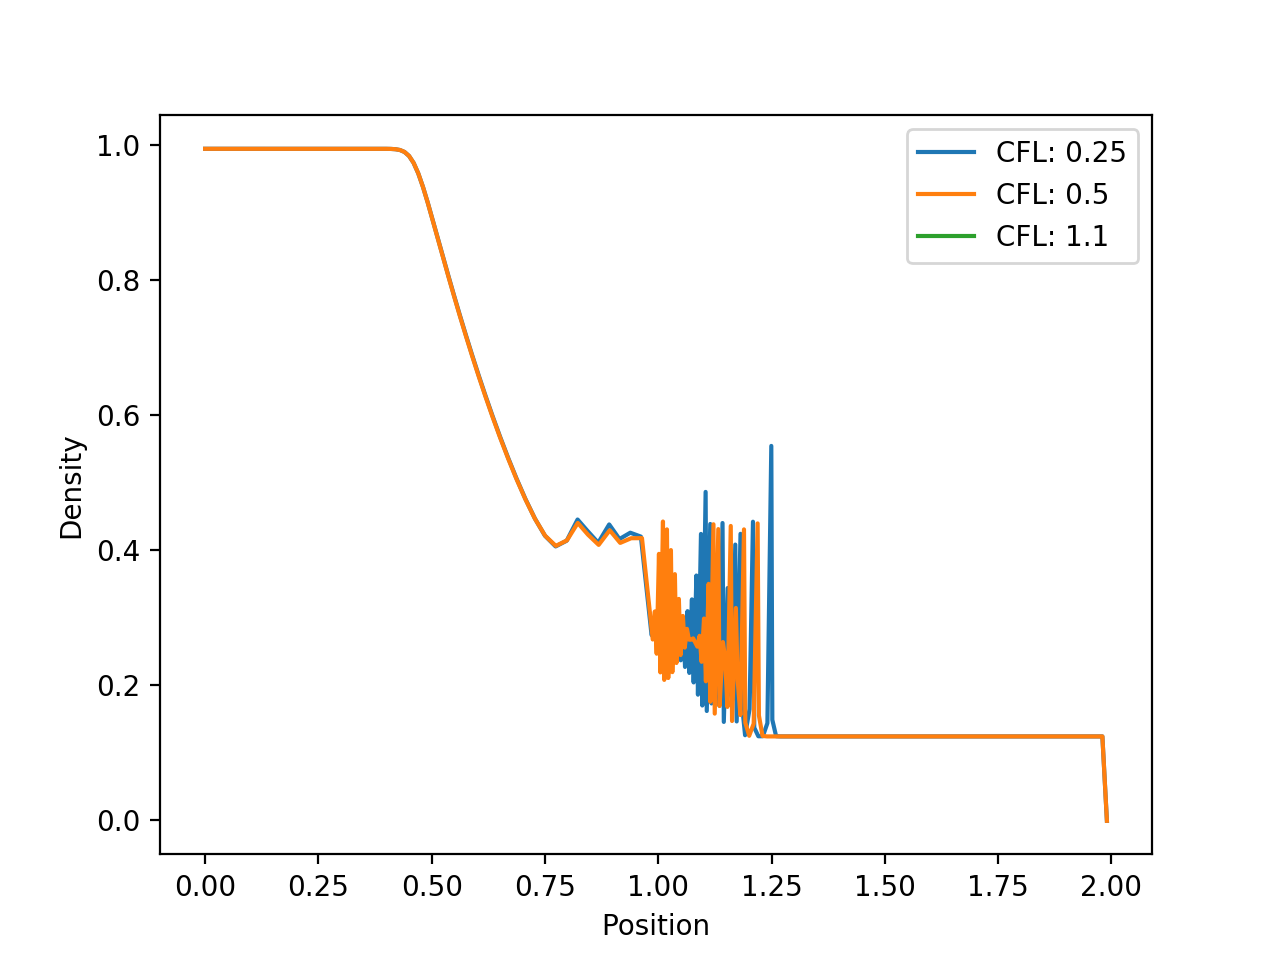

<IPython.core.display.Javascript object>


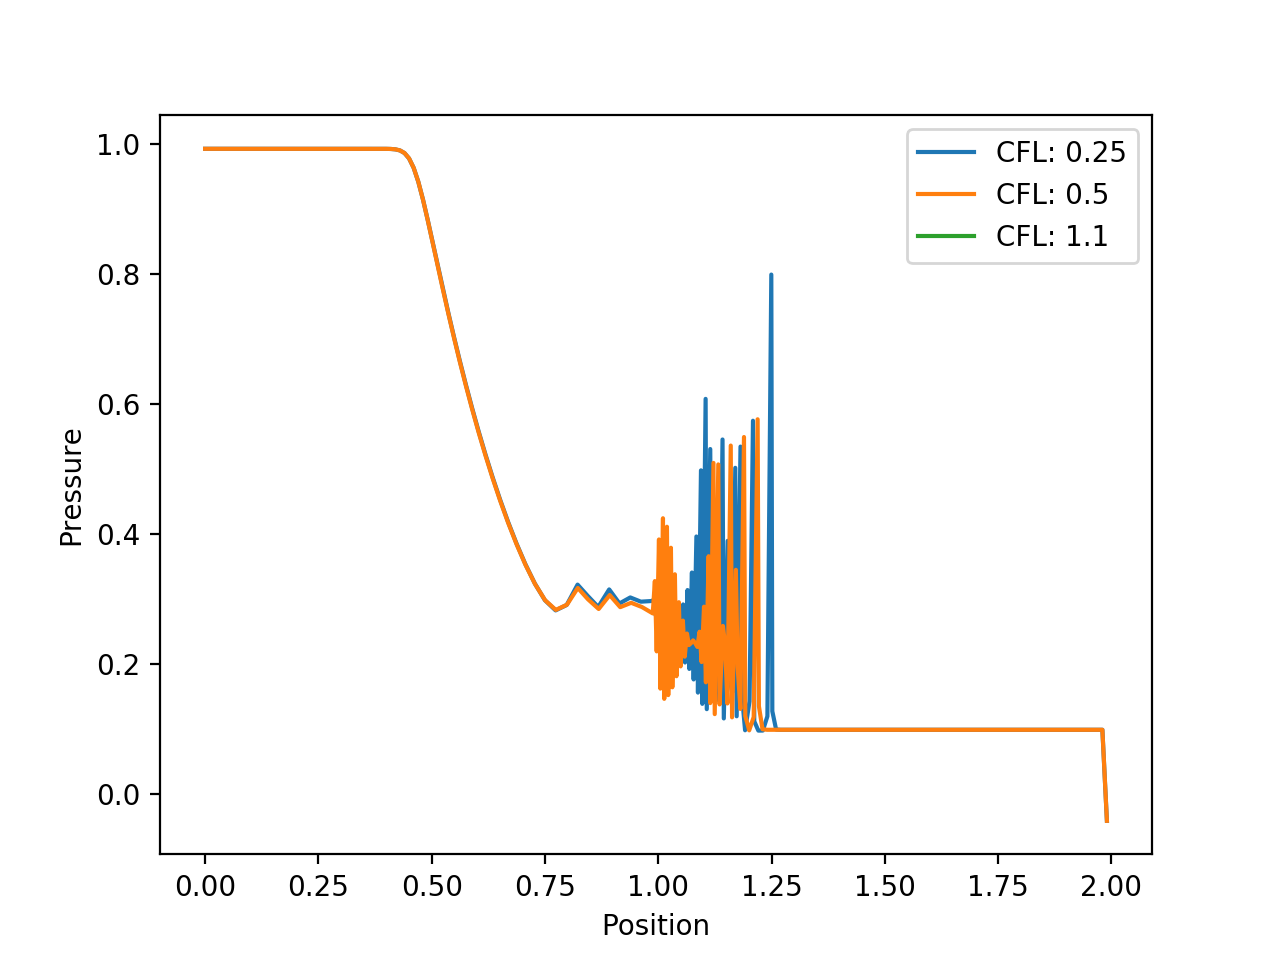

<IPython.core.display.Javascript object>


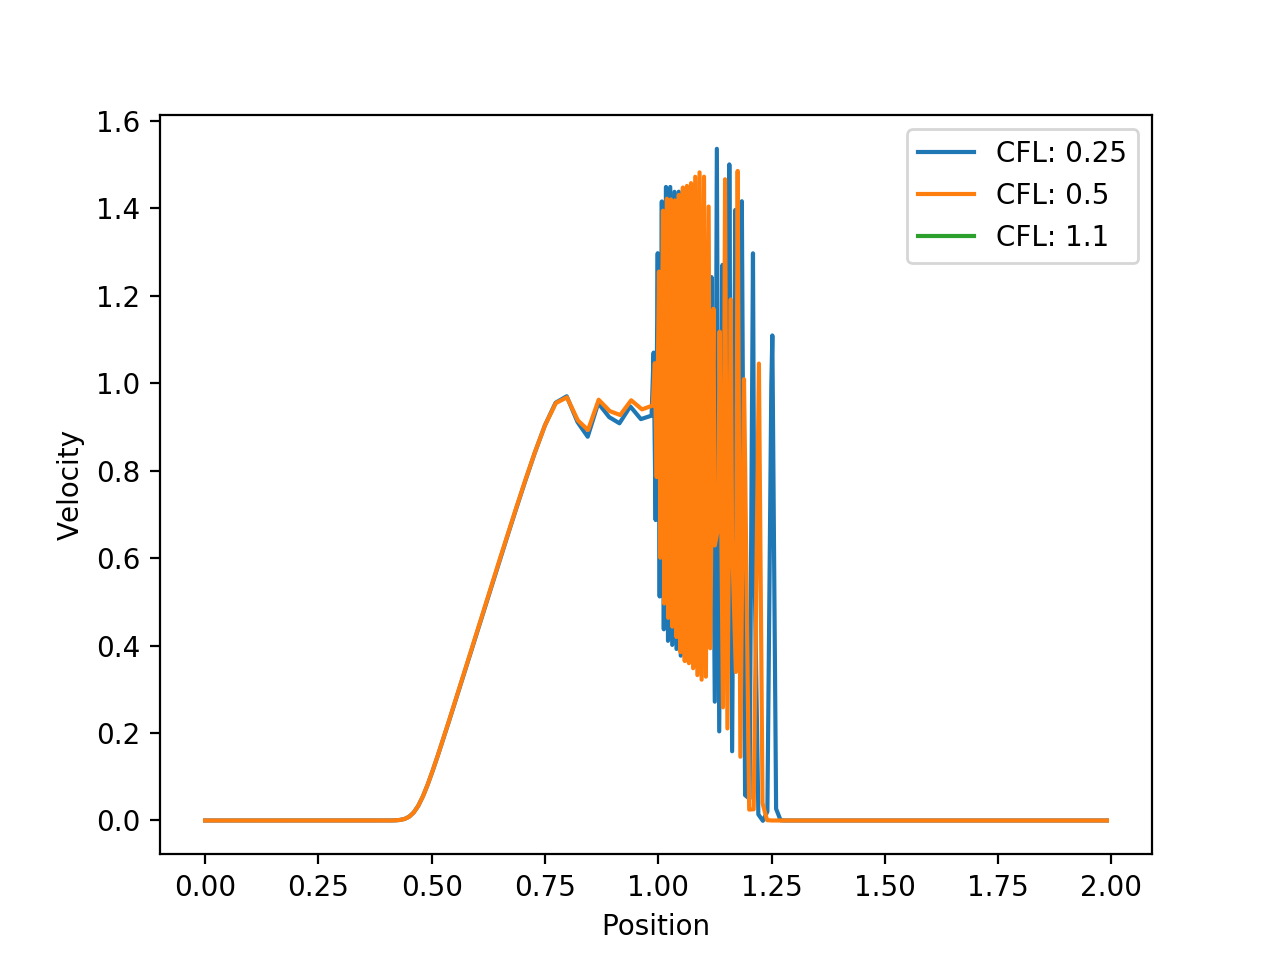

In [168]:
plt.figure()
plt.plot(xs[0], us[0], label = 'CFL: '+ str(CFLs[0]))
plt.plot(xs[1], us[1], label = 'CFL: '+ str(CFLs[1]))
plt.plot(xs[2], us[2], label = 'CFL: '+ str(CFLs[2]))
plt.xlabel('Position')
plt.ylabel('Speed')
plt.legend()

plt.figure()
plt.plot(xs[0], rhos[0][1:], label = 'CFL: '+ str(CFLs[0]))
plt.plot(xs[1], rhos[1][1:], label = 'CFL: '+ str(CFLs[1]))
plt.plot(xs[2], rhos[2][1:], label = 'CFL: '+ str(CFLs[2]))
plt.xlabel('Position')
plt.ylabel('Density')
plt.legend()

plt.figure()
plt.plot(xs[0], Ps[0][1:], label = 'CFL: '+ str(CFLs[0]))
plt.plot(xs[1], Ps[1][1:], label = 'CFL: '+ str(CFLs[1]))
plt.plot(xs[2], Ps[2][1:], label = 'CFL: '+ str(CFLs[2]))
plt.xlabel('Position')
plt.ylabel('Pressure')
plt.legend()

plt.figure()
plt.plot(xs[0], vs[0], label = 'CFL: '+ str(CFLs[0]))
plt.plot(xs[1], vs[1], label = 'CFL: '+ str(CFLs[1]))
plt.plot(xs[2], vs[2], label = 'CFL: '+ str(CFLs[2]))
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend()

## 2e: Sod Shock Tube ##
### Testing Artificial Viscosity Values ###

In [169]:
# constants given
q0 = 4
q1 = 0.5
gamma = 1.4
N = 200
CFL = 0.5

# varying viscosity coefficients
q0s = [2,  4, 8]
q1s = [0.25, 0.5, 1]

xs = []
us = []
rhos = []
Ps = []
vs = []
for q_test in range(len(q0s)):

    # position array - integer index
    x = np.arange(0, 2, 2/N)

    del_x = []
    for i in range(len(x)-1):
        del_x.append(x[i+1]-x[i])

    # velocity & speed array: integer index u
    v = np.zeros(N)
    u = np.zeros(N)

    # density, pressure, and energy all have half indices
    rho = [0]
    P = [0]
    for xi in x:
        if xi <=0.75:
            rho.append(1)
            P.append(1)
        else:
            rho.append(0.125)
            P.append(0.1)
    e = [0]
    for i in range(1, len(rho)):
        e.append(P[i]/(rho[i]*(gamma-1)))

    # artificial velocity has half indices
    # since initial velocity = 0, u = 0, so all q = 0
    q = np.zeros(N+1)

    # del_m_mid half indices, del_m integer        
    del_m_mid = [0]
    for i in range(1, len(rho)):
        m_mid = rho[i]*(max(x)-min(x))/N
        del_m_mid.append(m_mid)

    del_m  = []
    for i in range(len(del_m_mid)-1):
        m = (del_m_mid[i]+del_m_mid[i+1])/2
        del_m.append(m)

    # c_s is half index
    cs = [np.sqrt(gamma*P[i]/rho[i]) for i in range(1, len(P))]

    t = 0
    while t < 0.245:

        # time-step
        del_t = CFL*min(del_x)/(max(cs+np.abs(v)))

        # updating velocity
        v_new = [v[i]-del_t*(P[i+1]-P[i] + q[i+1]-q[i])/del_m[i] for i in range(len(v))]
        v = v_new
        v[0]=0
        v[-1]=0

        # updating grid positions
        x_new = [x[i]+del_t*v[i] for i in range(len(x))]
        del_x_new = []
        for i in range(len(x_new)-1):
            del_x_new.append(x_new[i+1]-x_new[i])
        x = x_new
        del_x = del_x_new

        # updating relative velocity
        u_new = [0]
        for i in range(len(del_x)):
            u_new.append(del_x[i]/del_t)
        u_new[-1]=0
        u = u_new

        # udpating density
        rho_new = [0]
        for i in range(len(x)):
            if i !=  len(x)-1:
                rho_new.append(del_m_mid[i+1]/(x[i+1]-x[i]))
            else:
                rho_new.append(del_m_mid[i+1]/(-x[i]))
        rho_average = [0]
        for i in range(1, len(rho)):
            rho_average_i = .5*(1/rho_new[i]+1/rho[i])
            rho_average.append(rho_average_i)

        # conditionally updating artificial velocity
        q_new = [0]
        for i in range(1, len(u)-1):
            if (u[i+1]-u[i])/(x[i+1]-x[i])<0:
                q_i = (q0s[q_test]*(u[i+1]-u[i])**2 - q1s[q_test]*(u[i+1]-u[i]))*cs[i+1]/rho_average[i]
                q_new.append(q_i)
            else:
                q_i = 0
                q_new.append(q_i)
        q = q_new
        # updating energy
        e_new = [0]
        for i in range(1, len(e)):
            e_new.append(e[i]-(P[i]+q[i])*(1/rho_new[i] - 1/rho[i]))
        rho = rho_new
        e = e_new

        # updating pressure
        P_new = [e[i]*rho[i]*(gamma-1) for i in range(len(e))]
        P = P_new

        # updating sound spped
        cs_new = [np.sqrt(gamma*P[i]/rho[i]) for i in range(1, len(P))]
        cs = cs_new 

        # updating time
        t = t+del_t
        
    xs.append(x)
    us.append(u)
    rhos.append(rho)
    Ps.append(P)
    vs.append(v)  

<IPython.core.display.Javascript object>


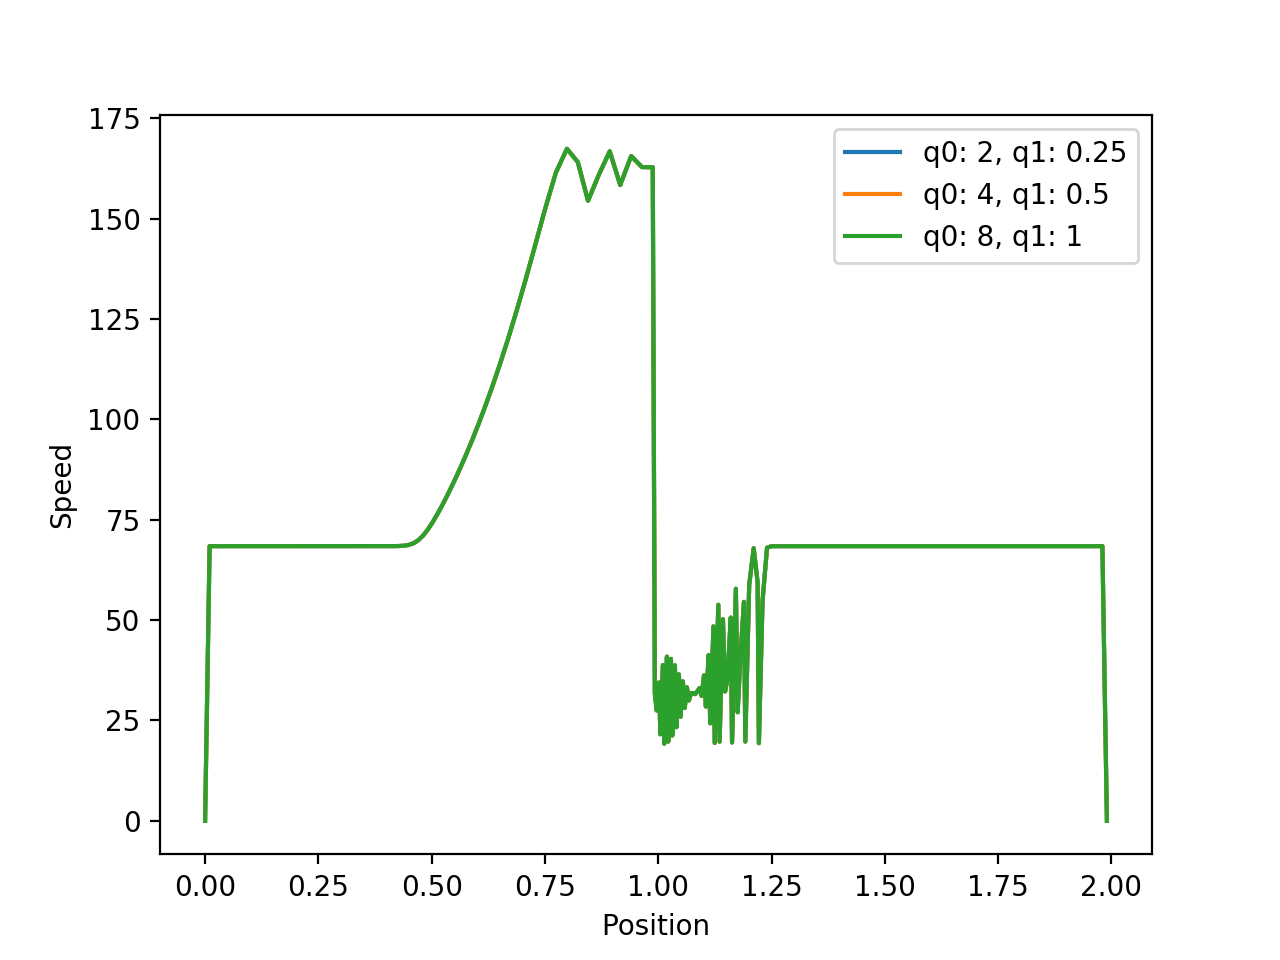

<IPython.core.display.Javascript object>


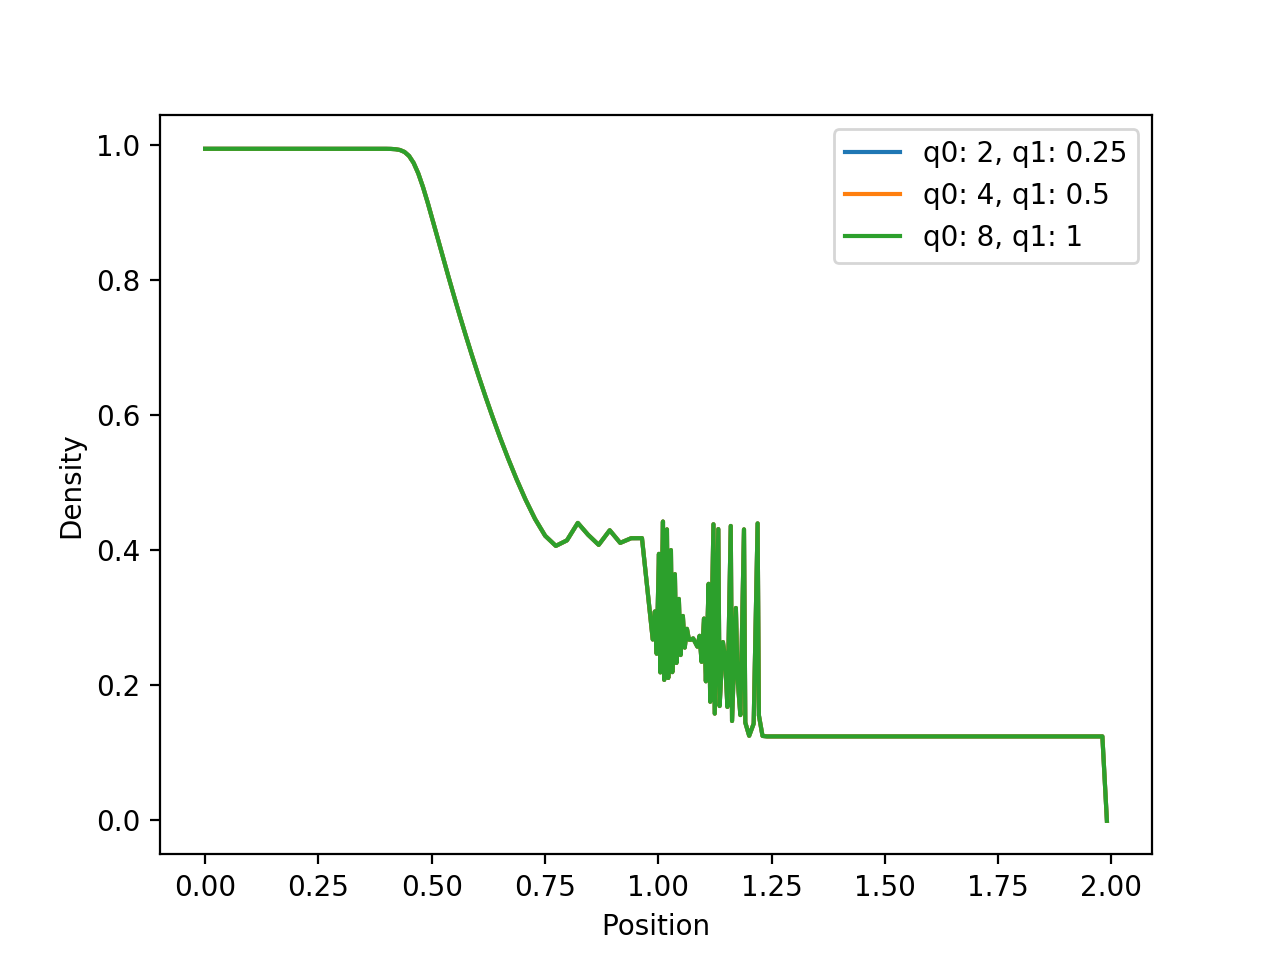

<IPython.core.display.Javascript object>


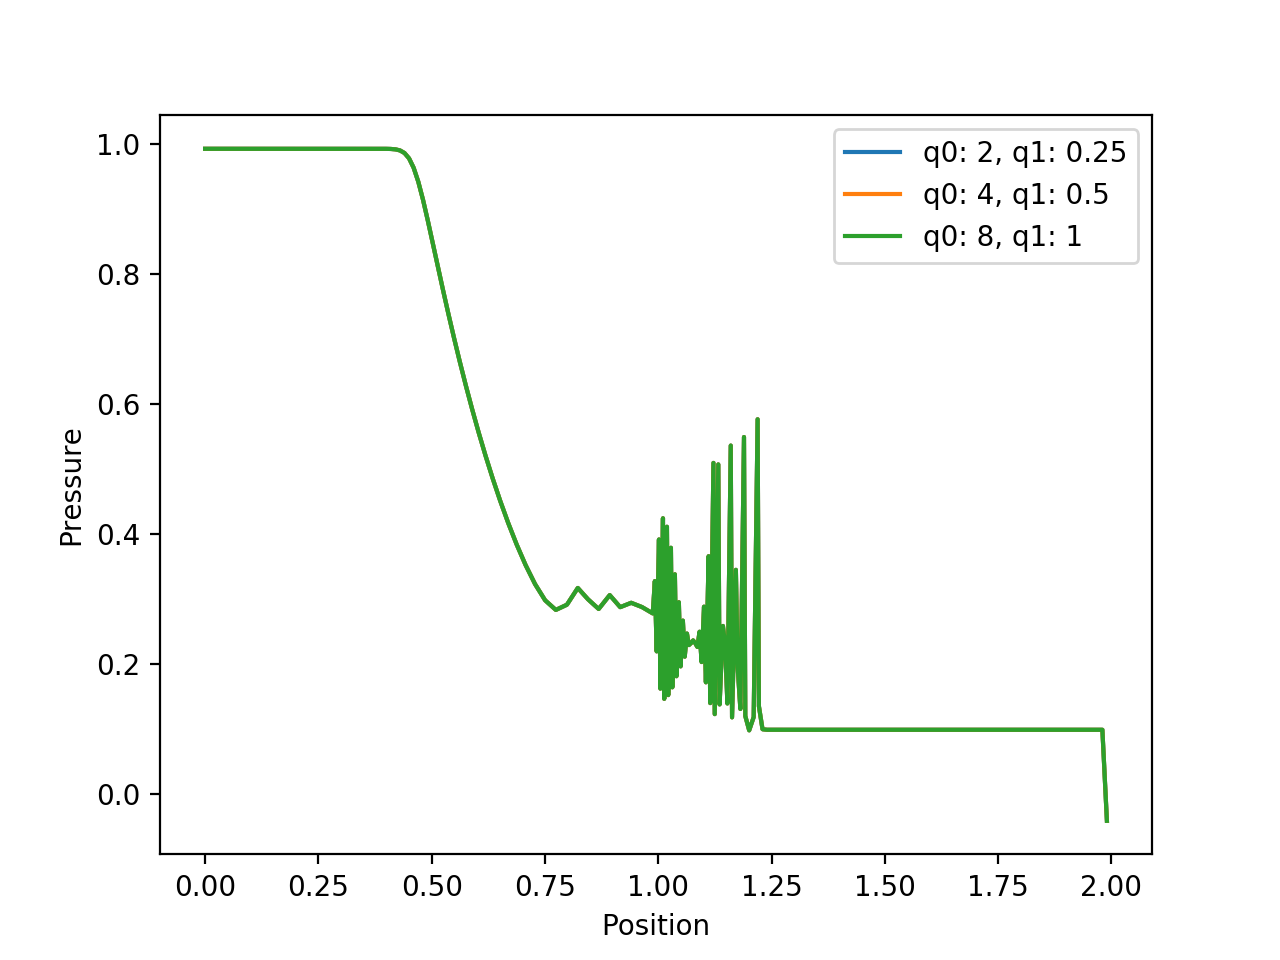

<IPython.core.display.Javascript object>


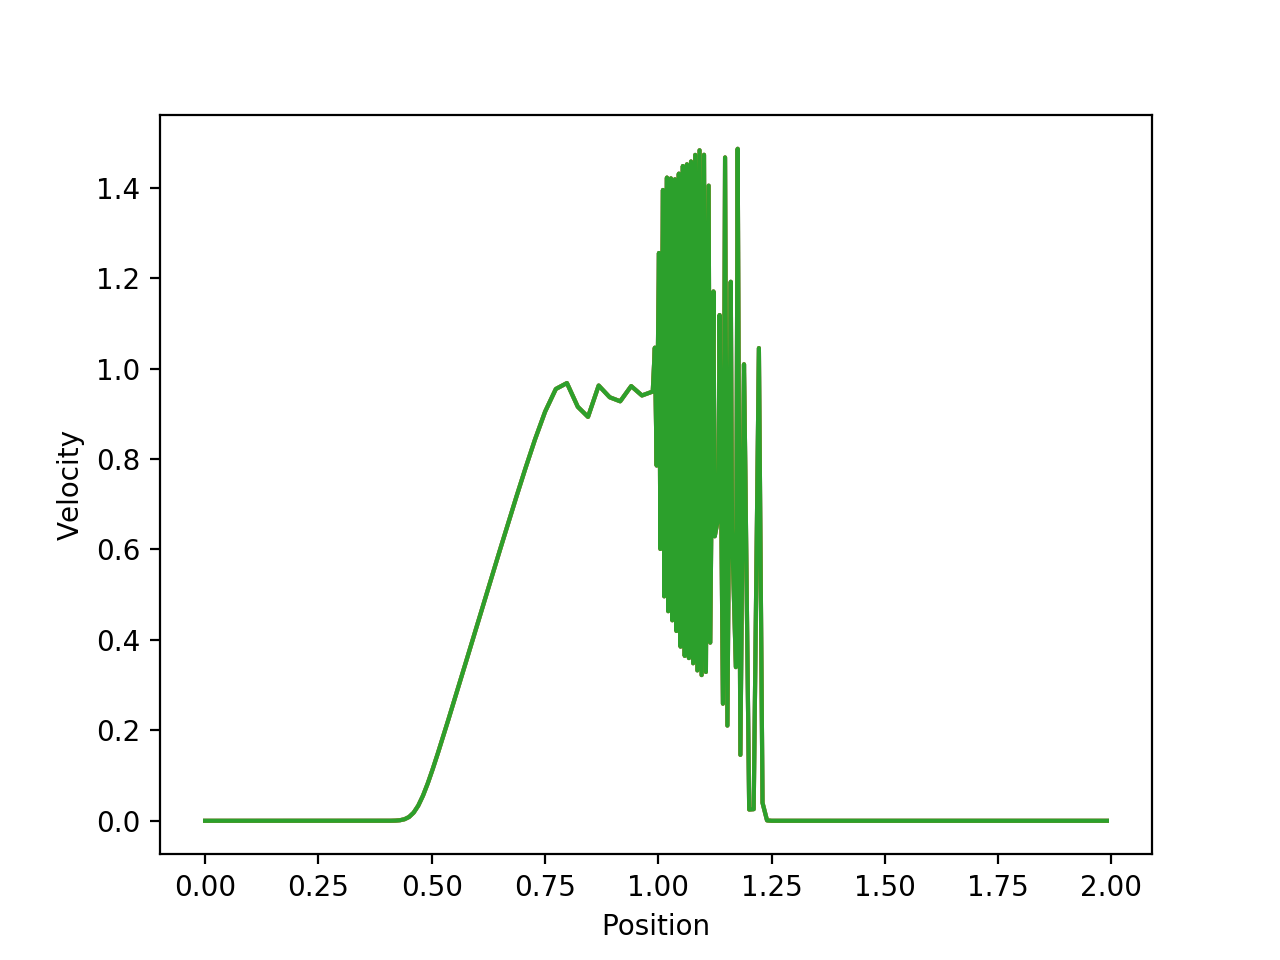

Text(0, 0.5, 'Velocity')

In [170]:
plt.figure()
plt.plot(xs[0], us[0], label = 'q0: '+ str(q0s[0]) + ', q1: '+ str(q1s[0]))
plt.plot(xs[1], us[1], label = 'q0: '+ str(q0s[1]) + ', q1: '+ str(q1s[1]))
plt.plot(xs[2], us[2], label = 'q0: '+ str(q0s[2]) + ', q1: '+ str(q1s[2]))
plt.xlabel('Position')
plt.ylabel('Speed')
plt.legend()

plt.figure()
plt.plot(xs[0], rhos[0][1:], label = 'q0: '+ str(q0s[0]) + ', q1: '+ str(q1s[0]))
plt.plot(xs[1], rhos[1][1:], label = 'q0: '+ str(q0s[1]) + ', q1: '+ str(q1s[1]))
plt.plot(xs[2], rhos[2][1:], label = 'q0: '+ str(q0s[2]) + ', q1: '+ str(q1s[2]))
plt.xlabel('Position')
plt.ylabel('Density')
plt.legend()

plt.figure()
plt.plot(xs[0], Ps[0][1:], label = 'q0: '+ str(q0s[0]) + ', q1: '+ str(q1s[0]))
plt.plot(xs[1], Ps[1][1:], label = 'q0: '+ str(q0s[1]) + ', q1: '+ str(q1s[1]))
plt.plot(xs[2], Ps[2][1:], label = 'q0: '+ str(q0s[2]) + ', q1: '+ str(q1s[2]))
plt.xlabel('Position')
plt.ylabel('Pressure')
plt.legend()

plt.figure()
plt.plot(xs[0], vs[0], label = 'q0: '+ str(q0s[0]) + ', q1: ' +str(q1s[0]))
plt.plot(xs[1], vs[1], label = 'q0: '+ str(q0s[1]) + ', q1: ' +str(q1s[1]))
plt.plot(xs[2], vs[2], label = 'q0: '+ str(q0s[2]) + ', q1: '+ str(q1s[2]))
plt.xlabel('Position')
plt.ylabel('Velocity')